In [1]:
from ipynb.fs.defs.functions import *

from datetime import datetime
import networkx as nx
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import sys
import contextlib
import itertools
from math import comb
from numpy import linalg as LA
import math
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
from math import factorial as f
import networkx as nx
import itertools
import time
import pandas as pd
import random as rnd

def theoretic_fixation_moran(nodes,fitness):
    if fitness==1:
        return 1/(nodes)
    else:
        k=(1-1/fitness)/(1-1/(pow(fitness,nodes)))
        return k

In [2]:
graph_enum_6 = iso_graph(get_all_graphs(6))

In [54]:
for u,v in G.edges():
    G[u][v]['weight']=rnd.random()
    
[matrix_solver(T_weightMat(graph_enum_6[111],i/10))-matrix_solver(T_weightMat(G,i/10)) for  i in range(1,20)]

In [37]:
start_time = datetime.now()

weighted_networks_100 = np.zeros((112, 100), dtype=object)
for i in range(112):
    for j in range(100):
        G=graph_enum_6[i]
        for u,v in G.edges():
            G[u][v]['weight']=rnd.random()
        weighted_networks_10[i,j]=[matrix_solver(T_weightMat(G,k/10))-theoretic_fixation_moran(6,k/10) for  k in range(1,20)]
        
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))        

np.save('weighted_networks_bd_100.npy' , weighted_networks_100 )

IndexError: index 10 is out of bounds for axis 1 with size 10

In [7]:
####loading data

weighted_networks_10 = np.load('weighted_networks.npy', allow_pickle= True)

In [8]:
weighted_networks_100 = np.load('weighted_networks_100.npy', allow_pickle= True)

In [173]:
##classifying 

classifier = np.zeros((112, 10), dtype=object)

check=[]

for i in range(112):
    for j in range(10):
        for k in range(3,19):
            if k==9:
                continue
            check.append(np.sign(weighted_networks_10[i][j][k]))
        if check==[1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1]:
            #suppressor
            classifier[i,j]= "Suppressor"
        elif check==[-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1]:
            #amplifier
            classifier[i,j]= "Amplifier"
        elif check==[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]:
            #isothermal
            classifier[i,j]= "Isothermal"
        else:
            #neither
            classifier[i,j]= "Neither"
        check=[]
            

In [177]:
###list of suppressors and 'neither' networks
amp=0
sup=0
neither=0
iso=0

sup_list=[]
neither_list=[]
iso_list=[]

for i in range(112):
    for j in range(10):
        if classifier[i,j]== "Suppressor":
            sup+=1
            sup_list.append([i,j])
        elif classifier[i,j]== "Amplifier":
            amp+=1
        elif classifier[i,j]== "Isothermal":
            iso+=1
            iso_list.append([i,j])
        else:
            neither+=1
            neither_list.append([i,j])
            
            
print(amp, sup, neither,iso)

In [178]:
print(amp, sup, neither,iso)

627 392 101 0


In [179]:
dfdata=[]
s=0
a=0
n=0
for i in range(112):
    #each row will contain 4 things, graph enumeration, number of amps, sups, neither 
    a= list(classifier[i]).count('Amplifier')#count number of occurrences of amplifier in classifier
    s= list(classifier[i]).count('Suppressor')
    n= 10-a-s
    dfdata.append([i,a,s,n])

In [181]:
#reading in the dataframe
df.to_pickle('weighted_networks.pkl')  
df = pd.read_pickle('weighted_networks.pkl')

In [207]:
df.head(10)

,Amplifiers,Suppressors,Neither,Unweighted Network Type
0,7,1,2,Amplifier
1,3,4,3,Amplifier
2,9,0,1,Amplifier
3,7,2,1,Amplifier
4,7,3,0,Amplifier
5,5,5,0,Amplifier
6,9,1,0,Amplifier
7,7,1,2,Amplifier
8,6,3,1,Amplifier
9,8,1,1,Amplifier


In [208]:
df.to_csv('Weighted_Networks.csv')

In [202]:
network_type[102]="Suprressor"

### 100 runs

In [209]:
start_time = datetime.now()

weighted_networks_100 = np.zeros((112, 100), dtype=object)
for i in range(112):
    for j in range(100):
        G=graph_enum_6[i]
        for u,v in G.edges():
            G[u][v]['weight']=rnd.random()
        weighted_networks_100[i,j]=[matrix_solver(T_weightMat(G,k/10))-theoretic_fixation_moran(6,k/10) for  k in range(1,20)]
        
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))        

np.save('weighted_networks_100.npy' , weighted_networks_100 )

Duration: 4:53:16.596429


In [20]:
##classifying 

classifier_100 = np.zeros((112, 100), dtype=object)

check=[]

for i in range(112):
    for j in range(100):
        for k in range(3,19):
            if k==9:
                continue
            check.append(np.sign(weighted_networks_100[i][j][k]))
        if check==[1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1]:
            #suppressor
            classifier_100[i,j]= "Suppressor"
        elif check==[-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1]:
            #amplifier
            classifier_100[i,j]= "Amplifier"
        elif check==[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]:
            #isothermal
            classifier_100[i,j]= "Isothermal"
        else:
            #neither
            classifier_100[i,j]= "Neither"
        check=[]
            

In [21]:
###list of suppressors and 'neither' networks
amp_100=0
sup_100=0
neither_100=0
iso_100=0

sup_list_100=[]
neither_list_100=[]
iso_list_100=[]
sup_num=[]
for i in range(112):
    c=0
    for j in range(100):
        if classifier_100[i,j]== "Suppressor":
            c+=1
            sup_100+=1
            sup_list_100.append([i,j])
        elif classifier_100[i,j]== "Amplifier":
            amp_100+=1
        elif classifier_100[i,j]== "Isothermal":
            iso_100+=1
            iso_list_100.append([i,j])
        else:
            neither_100+=1
            neither_list_100.append([i,j])
    sup_num.append(c)
            
            
print(amp_100, sup_100, neither_100,iso_100)

6165 3862 1173 0


In [22]:
sup_num

[17,
 15,
 25,
 30,
 24,
 36,
 25,
 26,
 14,
 35,
 38,
 20,
 25,
 22,
 31,
 37,
 43,
 34,
 87,
 25,
 34,
 23,
 22,
 31,
 16,
 22,
 32,
 21,
 36,
 32,
 29,
 32,
 30,
 25,
 41,
 55,
 45,
 36,
 25,
 34,
 21,
 27,
 32,
 34,
 22,
 30,
 31,
 39,
 39,
 14,
 13,
 23,
 22,
 41,
 42,
 52,
 53,
 18,
 42,
 78,
 30,
 27,
 25,
 35,
 35,
 3,
 21,
 32,
 24,
 18,
 22,
 40,
 54,
 25,
 17,
 35,
 41,
 65,
 76,
 81,
 34,
 43,
 18,
 17,
 23,
 22,
 26,
 22,
 40,
 57,
 65,
 42,
 56,
 52,
 40,
 17,
 24,
 55,
 26,
 17,
 37,
 54,
 74,
 29,
 17,
 23,
 54,
 71,
 30,
 54,
 52,
 62]

## Higher nodes networks

True


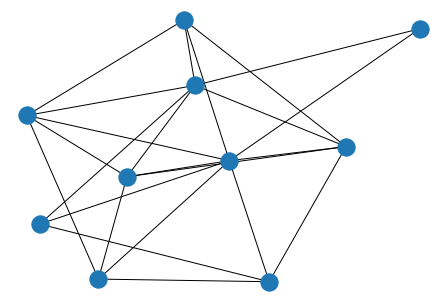

In [221]:
G=nx.erdos_renyi_graph(10, 0.37, seed=None, directed=False)
nx.draw(G)
print(nx.is_connected(G))

In [224]:
start_time = datetime.now()

print([matrix_solver(T_weightMat(G,i/10))-theoretic_fixation_moran(10,i/10) for  i in range(1,20)])


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))   

[-4.837830559172194e-10, -1.8618375468588033e-07, -5.205126331226145e-06, -4.815889697390933e-05, -0.000233446216662268, -0.0007122068435369976, -0.0014658143515590052, -0.00202884671109747, -0.001655033028713268, 3.3306690738754696e-16, 0.00253615996638476, 0.005223193721575564, 0.007521009408815449, 0.009222499713520127, 0.010345030989156567, 0.010997074337346868, 0.011300009220319485, 0.011357230739303725, 0.011247597167323264]
Duration: 0:04:57.740644


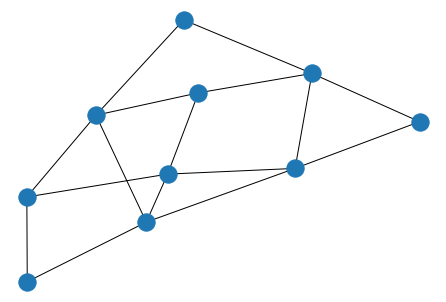

In [317]:
nx.draw(nx.fast_gnp_random_graph(10, 0.4, seed=None, directed=False))

## Some outputs

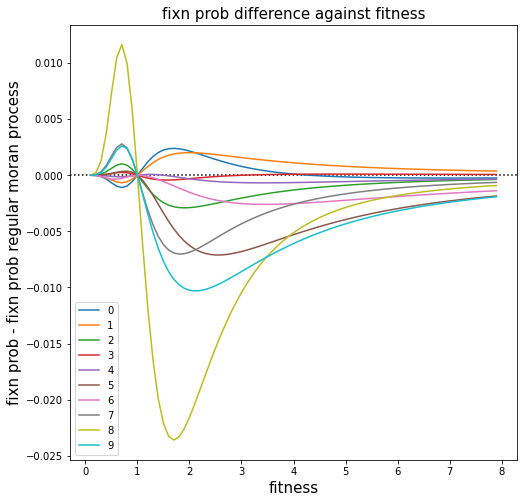

In [108]:
G=graph_enum_6[77]
for u,v in G.edges():
    G[u][v]['weight']=rnd.random()
    



plt.figure(figsize=(8, 8))
plt.axhline(y=0, color='black', ls=':')
for(l) in range(10):
    plt.plot([i/10 for i in range(1,80)],[matrix_solver(T_weightMat(G,i/10))-theoretic_fixation_moran(6,i/10) for  i in range(1,80)],label=l)
    for u,v in G.edges():
        G[u][v]['weight']=rnd.random()



plt.title('fixn prob difference against fitness',fontsize=15)
plt.xlabel('fitness',fontsize=15)
plt.ylabel('fixn prob - fixn prob regular moran process',fontsize=15)
plt.legend()
plt.show()


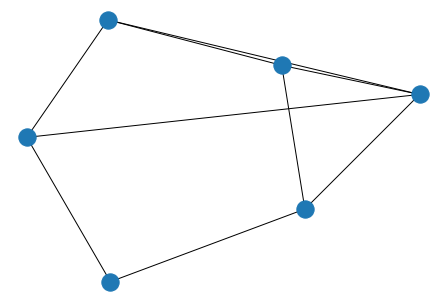

In [132]:
nx.draw(graph_enum_6[77])

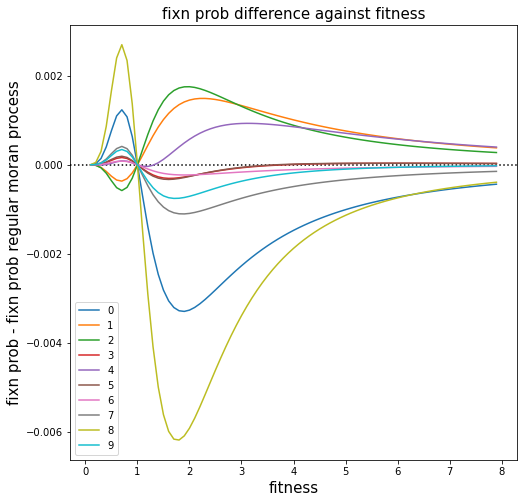

In [120]:
G=graph_enum_6[111]
for u,v in G.edges():
    G[u][v]['weight']=rnd.random()
    



plt.figure(figsize=(8, 8))
plt.axhline(y=0, color='black', ls=':')
for(l) in range(10):
    plt.plot([i/10 for i in range(1,80)],[matrix_solver(T_weightMat(G,i/10))-theoretic_fixation_moran(6,i/10) for  i in range(1,80)],label=l)
    for u,v in G.edges():
        G[u][v]['weight']=rnd.random()



plt.title('fixn prob difference against fitness',fontsize=15)
plt.xlabel('fitness',fontsize=15)
plt.ylabel('fixn prob - fixn prob regular moran process',fontsize=15)
plt.legend()
plt.show()


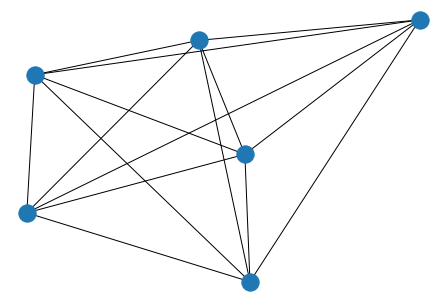

In [131]:
nx.draw(G=graph_enum_6[111])

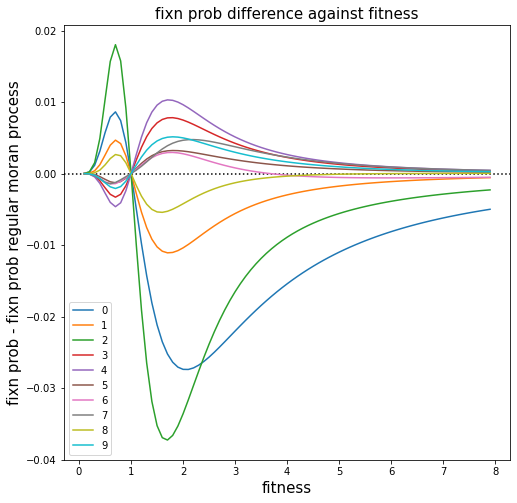

In [129]:
G=graph_enum_6[37]
for u,v in G.edges():
    G[u][v]['weight']=rnd.random()
    



plt.figure(figsize=(8, 8))
plt.axhline(y=0, color='black', ls=':')
for(l) in range(10):
    plt.plot([i/10 for i in range(1,80)],[matrix_solver(T_weightMat(G,i/10))-theoretic_fixation_moran(6,i/10) for  i in range(1,80)],label=l)
    for u,v in G.edges():
        G[u][v]['weight']=rnd.random()



plt.title('fixn prob difference against fitness',fontsize=15)
plt.xlabel('fitness',fontsize=15)
plt.ylabel('fixn prob - fixn prob regular moran process',fontsize=15)
plt.legend()
plt.show()


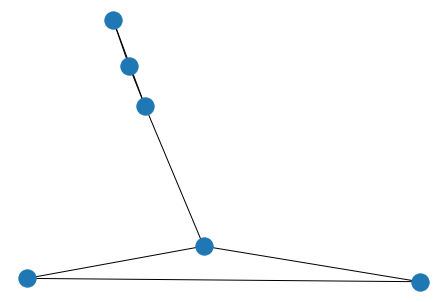

In [130]:
nx.draw(graph_enum_6[37])

## Scatterplots

In [5]:
weighted_networks_10_r_1_3=[matrix_solver(T_weightMat(graph_enum_6[j],1.3))-theoretic_fixation_moran(6,1.3) for  j in range(112)]
weighted_networks_10_r_0_9=[matrix_solver(T_weightMat(graph_enum_6[j],0.9))-theoretic_fixation_moran(6,0.9) for  j in range(112)]

In [6]:
weighted_networks_10_r_0_9=[matrix_solver(T_weightMat(graph_enum_6[j],0.9))-theoretic_fixation_moran(6,0.9) for  j in range(112)]

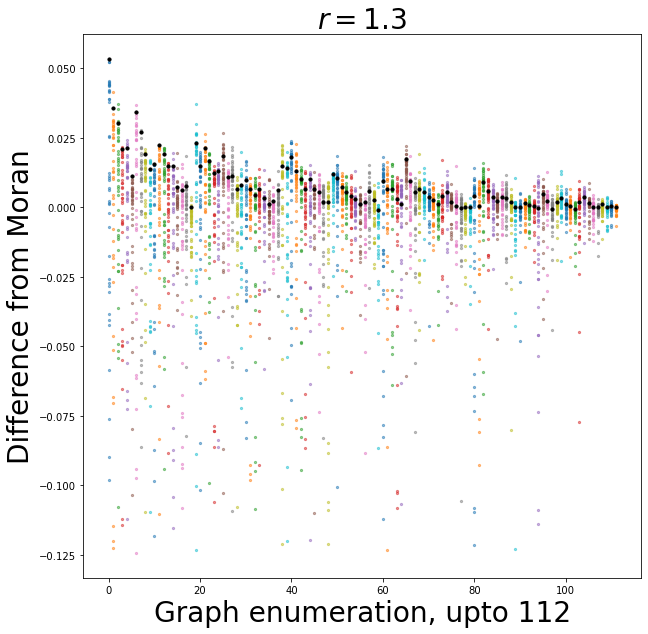

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)) 
dim=40
radius=5
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_100[j][i][12] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    plt.scatter(x, y,s=radius, alpha=0.5)
    plt.scatter(j,weighted_networks_10_r_1_3[j],s=2*radius,color='black')
    #plt.axvline(x = j, color = 'black', label = 'axvline - full height',linestyle='dashed')
plt.xlabel('Graph enumeration, upto 112',fontsize=28)
plt.ylabel('Difference from Moran',fontsize=28)
plt.title("$r=1.3$",fontsize=28)
plt.show()

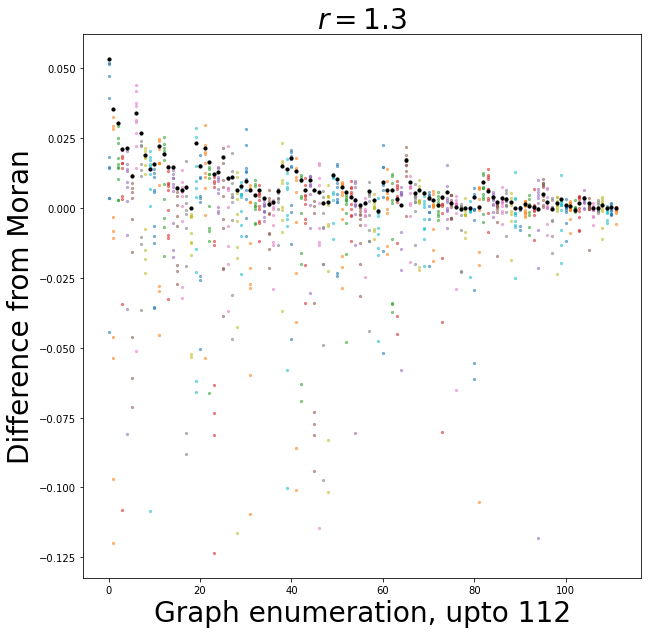

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)) 
dim=10
radius=5
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_10[j][i][12] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    plt.scatter(x, y,s=radius, alpha=0.5)
    plt.scatter(j,weighted_networks_10_r_1_3[j],s=2*radius,color='black')
    #plt.axvline(x = j, color = 'black', label = 'axvline - full height',linestyle='dashed')
plt.xlabel('Graph enumeration, upto 112',fontsize=28)
plt.ylabel('Difference from Moran',fontsize=28)
plt.title("$r=1.3$",fontsize=28)
plt.show()

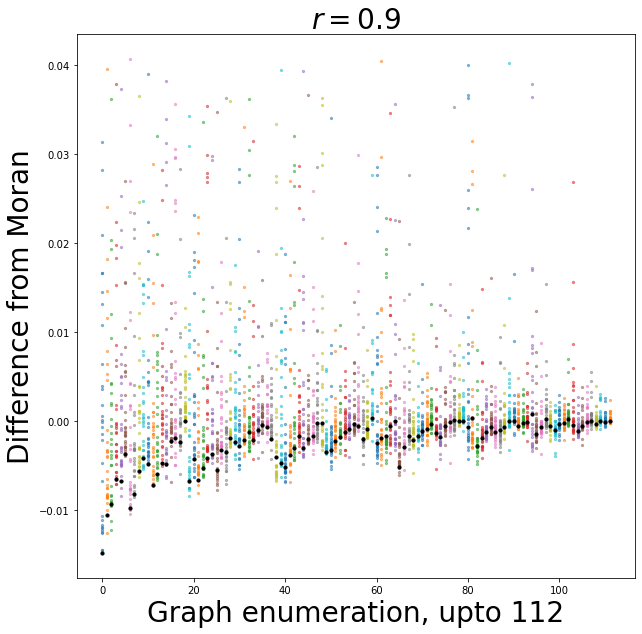

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)) 
dim=30
radius=5
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_100[j][i][8] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    plt.scatter(x, y,s=radius, alpha=0.5)
    plt.scatter(j,weighted_networks_10_r_0_9[j],s=2*radius,color='black')
    #plt.axvline(x = j, color = 'black', label = 'axvline - full height',linestyle='dashed')
plt.xlabel('Graph enumeration, upto 112',fontsize=28)
plt.ylabel('Difference from Moran',fontsize=28)
plt.title("$r=0.9$",fontsize=28)
plt.show()

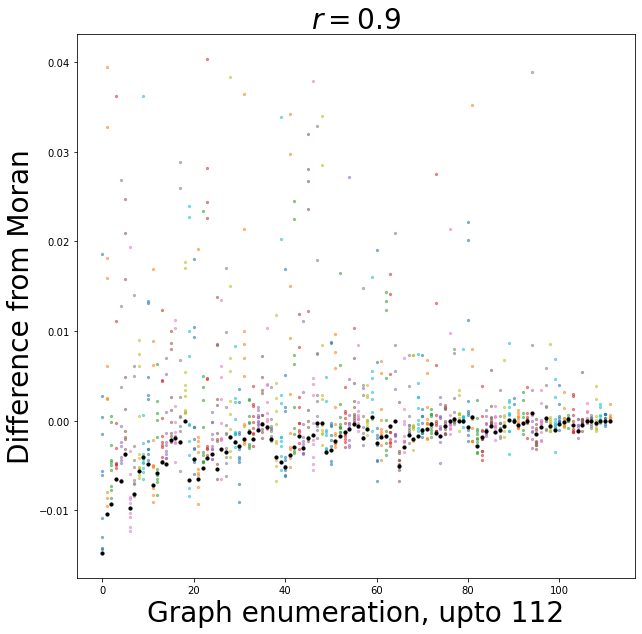

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)) 
dim=10
radius=5
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_10[j][i][8] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    plt.scatter(x, y,s=radius, alpha=0.5)
    plt.scatter(j,weighted_networks_10_r_0_9[j],s=2*radius,color='black')
    #plt.axvline(x = j, color = 'black', label = 'axvline - full height',linestyle='dashed')
plt.xlabel('Graph enumeration, upto 112',fontsize=28)
plt.ylabel('Difference from Moran',fontsize=28)
plt.title("$r=0.9$",fontsize=28)
plt.show()

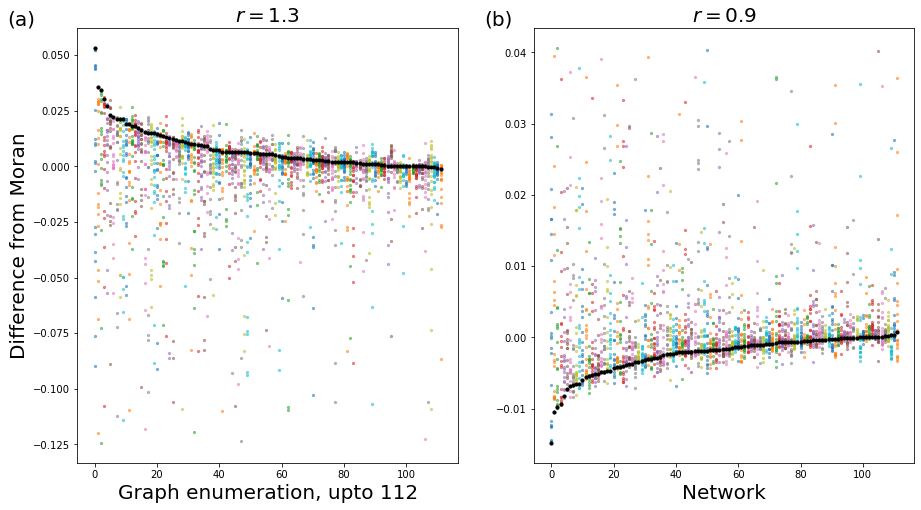

In [9]:
#plt.figure(figsize=(10, 10)) 
dim=20
radius=5
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
#fig, (ax1, ax2) = plt.subplots(1, 2)
#f, axs = plt.subplots(2, 2, figsize=(15, 15))
#fig.suptitle('Horizontally stacked subplots',fontsize=20)
indices_sort_by_value = sorted(range(len(weighted_networks_10_r_1_3)), key=lambda i: weighted_networks_10_r_1_3[i], reverse=True)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[0].scatter(x, y,s=radius, alpha=0.5)
    axs[0].scatter(j,weighted_networks_10_r_1_3[indices_sort_by_value[j]],s=2*radius,color='black')

indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[1].scatter(x, y,s=radius, alpha=0.5)
    axs[1].scatter(j,weighted_networks_10_r_0_9[indices_sorted_by_value[j]],s=2*radius,color='black')
    #plt.axvline(x = j, color = 'black', label = 'axvline - full height',linestyle='dashed')
axs[0].set_xlabel('Graph enumeration, upto 112',fontsize=20)
axs[0].set_ylabel('Difference from Moran',fontsize=20)

#axs[1].set_ylabel('Difference from Moran',fontsize=28)
axs[1].set_xlabel('Network',fontsize=20)

axs[0].set_title("$r=1.3$",fontsize=20)
axs[1].set_title("$r=0.9$",fontsize=20)
fig.text(0.06, 0.885, '(a)', fontsize=20)
fig.text(0.502, 0.885, '(b)', fontsize=20)
plt.savefig('bd_scatterplot.pdf', bbox_inches="tight")
plt.show()

In [9]:
#weighted_networks_10_r_0_9 = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
print(indices_sorted_by_value)


[0, 1, 6, 2, 7, 11, 4, 19, 21, 3, 12, 8, 25, 22, 40, 65, 10, 14, 39, 13, 20, 23, 9, 38, 41, 24, 5, 27, 49, 50, 26, 44, 42, 66, 30, 82, 60, 29, 17, 51, 15, 33, 68, 31, 37, 57, 45, 16, 83, 28, 61, 74, 52, 69, 43, 62, 46, 67, 95, 73, 53, 32, 86, 84, 104, 70, 34, 99, 87, 54, 71, 58, 80, 36, 96, 85, 88, 63, 75, 56, 98, 105, 91, 103, 35, 55, 72, 100, 108, 92, 47, 48, 101, 93, 110, 76, 106, 90, 109, 64, 107, 78, 18, 79, 111, 89, 77, 102, 97, 81, 59, 94]


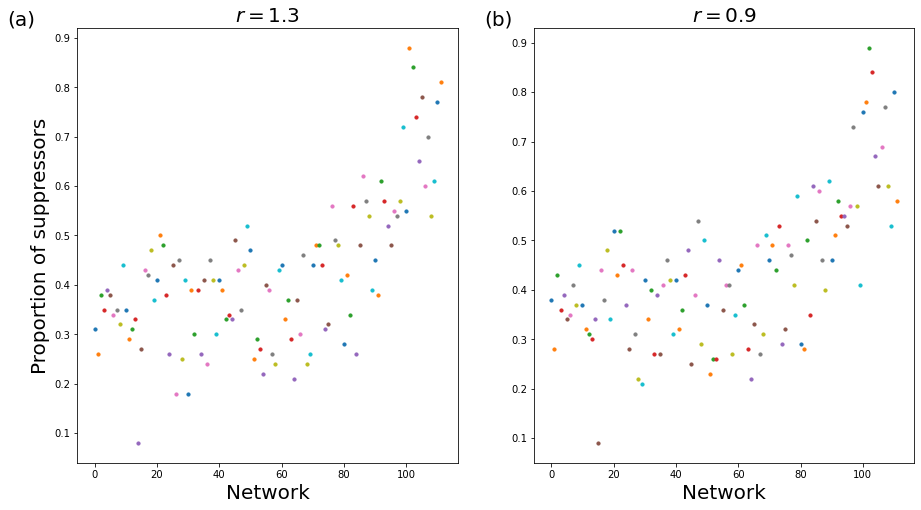

In [46]:
#plt.figure(figsize=(10, 10)) 
dim=100
radius=5
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
#fig, (ax1, ax2) = plt.subplots(1, 2)
#f, axs = plt.subplots(2, 2, figsize=(15, 15))
#fig.suptitle('Horizontally stacked subplots',fontsize=20)
indices_sort_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_1_3[i], reverse=True)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    #x = j*np.ones(dim)
    #y = [weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(dim)]
    #axs[0].scatter(x, y,s=radius, alpha=0.5)
    axs[0].scatter(j,sum(0.01 for num in [weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(100)] if num < 0),s=2*radius)

indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    #x = j*np.ones(dim)
    #y = [weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(dim)]
    #axs[0].scatter(x, y,s=radius, alpha=0.5)
    axs[1].scatter(j,sum(0.01 for num in [weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(100)] if num > 0),s=2*radius)

axs[0].set_xlabel('Network',fontsize=20)
axs[0].set_ylabel('Proportion of suppressors',fontsize=20)

#axs[1].set_ylabel('Difference from Moran',fontsize=28)
axs[1].set_xlabel('Network',fontsize=20)

axs[0].set_title("$r=1.3$",fontsize=20)
axs[1].set_title("$r=0.9$",fontsize=20)
fig.text(0.06, 0.885, '(a)', fontsize=20)
fig.text(0.502, 0.885, '(b)', fontsize=20)
plt.savefig('bd_scatterplot_avg_proportion.pdf', bbox_inches="tight")
plt.show()

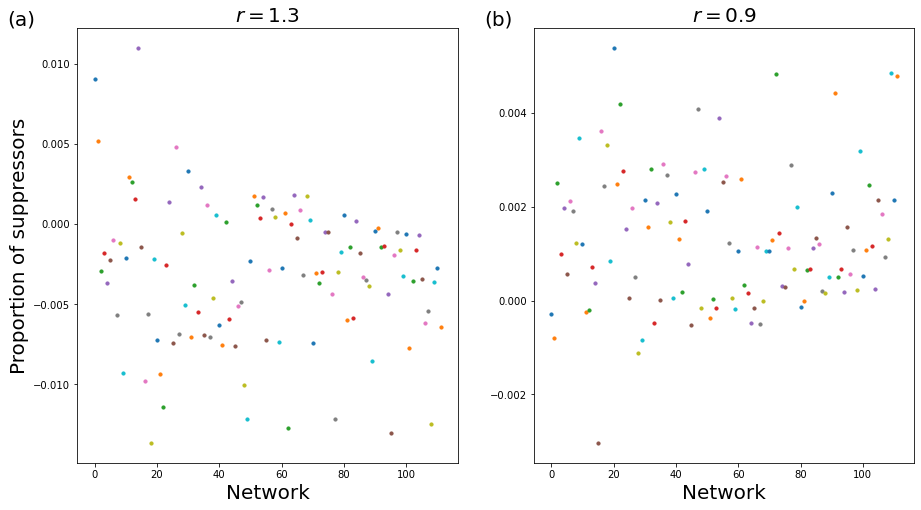

In [48]:
#plt.figure(figsize=(10, 10)) 
dim=100
radius=5
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
#fig, (ax1, ax2) = plt.subplots(1, 2)
#f, axs = plt.subplots(2, 2, figsize=(15, 15))
#fig.suptitle('Horizontally stacked subplots',fontsize=20)
indices_sort_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_1_3[i], reverse=True)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    #x = j*np.ones(dim)
    #y = [weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(dim)]
    #axs[0].scatter(x, y,s=radius, alpha=0.5)
    axs[0].scatter(j, sum([weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(100)])/dim,s=2*radius)

indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    #x = j*np.ones(dim)
    #y = [weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(dim)]
    #axs[0].scatter(x, y,s=radius, alpha=0.5)
    axs[1].scatter(j, sum([weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(100)])/dim,s=2*radius)

axs[0].set_xlabel('Network',fontsize=20)
axs[0].set_ylabel('Proportion of suppressors',fontsize=20)

#axs[1].set_ylabel('Difference from Moran',fontsize=28)
axs[1].set_xlabel('Network',fontsize=20)

axs[0].set_title("$r=1.3$",fontsize=20)
axs[1].set_title("$r=0.9$",fontsize=20)
fig.text(0.06, 0.885, '(a)', fontsize=20)
fig.text(0.502, 0.885, '(b)', fontsize=20)
plt.savefig('bd_scatterplot_avg.pdf', bbox_inches="tight")
plt.show()

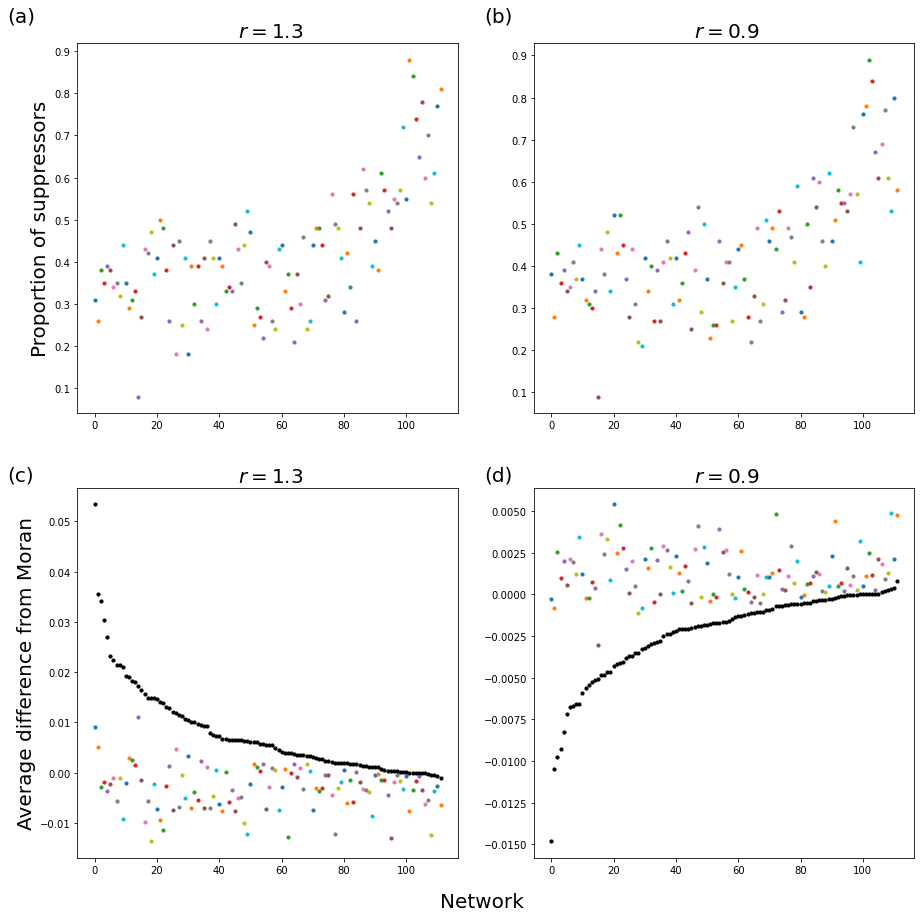

In [58]:
import matplotlib.pyplot as plt

# Assuming 'weighted_networks_100' and other data are defined somewhere in your code
# ...

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# First subplot (Top Left - (a))
indices_sort_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_1_3[i], reverse=True)
for j in range(112):
    axs[0, 0].scatter(j, sum(0.01 for num in [weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(100)] if num < 0), s=2*radius)
#axs[0, 0].set_xlabel('Network', fontsize=20)
axs[0, 0].set_ylabel('Proportion of suppressors', fontsize=20)
axs[0, 0].set_title(" $r=1.3$", fontsize=20)

# Second subplot (Top Right - (b))
indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
for j in range(112):
    axs[0, 1].scatter(j, sum(0.01 for num in [weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(100)] if num > 0), s=2*radius)
#axs[0, 1].set_xlabel('Network', fontsize=20)
axs[0, 1].set_title(" $r=0.9$", fontsize=20)

# Third subplot (Bottom Left - (c))
for j in range(112):
    axs[1, 0].scatter(j, sum([weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(100)])/dim, s=2*radius)
#axs[1, 0].set_xlabel('Network', fontsize=20)
    axs[1,0].scatter(j,weighted_networks_10_r_1_3[indices_sort_by_value[j]],s=2*radius,color='black')
axs[1, 0].set_ylabel('Average difference from Moran', fontsize=20)
axs[1, 0].set_title(" $r=1.3$", fontsize=20)

# Fourth subplot (Bottom Right - (d))
for j in range(112):
    axs[1, 1].scatter(j, sum([weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(100)])/dim, s=2*radius)
#axs[1, 1].set_xlabel('Network', fontsize=20)
    axs[1,1].scatter(j,weighted_networks_10_r_0_9[indices_sorted_by_value[j]],s=2*radius,color='black')
axs[1, 1].set_title(" $r=0.9$", fontsize=20)

fig.text(0.06, 0.9, '(a)', fontsize=20)
fig.text(0.502, 0.9, '(b)', fontsize=20)
fig.text(0.06, 0.475, '(c)', fontsize=20)
fig.text(0.502, 0.475, '(d)', fontsize=20)
# Adjusting layout
#plt.tight_layout()
#fig.suptitle('Network', fontsize=20)
fig.text(0.5, 0.08, 'Network', ha='center', fontsize=20)
# Saving and showing the plot
plt.savefig('combined_avg_proportion_scatterplot.pdf', bbox_inches="tight")
plt.show()


## combined stuff


In [3]:
    
def theoretic_fixation_moran_dB(nodes,fitness):
    if fitness==1:
        return 1/(nodes)
    else:
        k=((nodes-1)/(nodes))*((1-1/fitness)/(1-1/(pow(fitness,nodes-1))))
        return k
weighted_networks_100 = np.load('weighted_networks_100.npy', allow_pickle= True) 
weighted_networks_db_6nodes=np.load('weighted_networks_db_6nodes.npy', allow_pickle=True)
graph_6_nodes_db_unweighted_r_1_3=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],1.3))-theoretic_fixation_moran_dB(6,1.3) for i in range(112)]
graph_6_nodes_db_unweighted_r_0_9=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],0.9))-theoretic_fixation_moran_dB(6,0.9) for i in range(112)]

In [4]:
weighted_networks_10_r_1_3=[matrix_solver(T_weightMat(graph_enum_6[j],1.3))-theoretic_fixation_moran(6,1.3) for  j in range(112)]
weighted_networks_10_r_0_9=[matrix_solver(T_weightMat(graph_enum_6[j],0.9))-theoretic_fixation_moran(6,0.9) for  j in range(112)]

In [ ]:
#plt.figure(figsize=(10, 10)) 
dim=20
radius=5
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
#fig, (ax1, ax2) = plt.subplots(1, 2)
#f, axs = plt.subplots(2, 2, figsize=(15, 15))
#fig.suptitle('Horizontally stacked subplots',fontsize=20)
indices_sort_by_value = sorted(range(len(weighted_networks_10_r_1_3)), key=lambda i: weighted_networks_10_r_1_3[i], reverse=True)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[0].scatter(x, y,s=radius, alpha=0.5)
    axs[0].scatter(j,weighted_networks_10_r_1_3[indices_sort_by_value[j]],s=2*radius,color='black')

indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[1].scatter(x, y,s=radius, alpha=0.5)
    axs[1].scatter(j,weighted_networks_10_r_0_9[indices_sorted_by_value[j]],s=2*radius,color='black')
    #plt.axvline(x = j, color = 'black', label = 'axvline - full height',linestyle='dashed')
axs[0].set_xlabel('Graph enumeration, upto 112',fontsize=20)
axs[0].set_ylabel('Difference from Moran',fontsize=20)

#axs[1].set_ylabel('Difference from Moran',fontsize=28)
axs[1].set_xlabel('Network',fontsize=20)

axs[0].set_title("$r=1.3$",fontsize=20)
axs[1].set_title("$r=0.9$",fontsize=20)
fig.text(0.06, 0.885, '(a)', fontsize=20)
fig.text(0.502, 0.885, '(b)', fontsize=20)
plt.savefig('bd_scatterplot.pdf', bbox_inches="tight")
plt.show()

#plt.figure(figsize=(10, 10)) 
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
dim=20
radius=5
#fig, (ax1, ax2) = plt.subplots(1, 2)
#f, axs = plt.subplots(2, 2, figsize=(15, 15))
#fig.suptitle('Horizontally stacked subplots',fontsize=20)
indices_sort_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_1_3)), key=lambda i: graph_6_nodes_db_unweighted_r_1_3[i], reverse=True)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_db_6nodes[indices_sort_by_value[j]][i][12] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[0].scatter(x, y,s=radius, alpha=0.5)
    axs[0].scatter(j,graph_6_nodes_db_unweighted_r_1_3[indices_sort_by_value[j]],s=2*radius,color='black')
    
indices_sorted_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_0_9)), key=lambda i: graph_6_nodes_db_unweighted_r_0_9[i], reverse=False)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_db_6nodes[indices_sorted_by_value[j]][i][8] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[1].scatter(x, y,s=radius, alpha=0.5)
    axs[1].scatter(j,graph_6_nodes_db_unweighted_r_0_9[indices_sorted_by_value[j]],s=2*radius,color='black')
axs[0].set_xlabel('Network',fontsize=20)
axs[0].set_ylabel('Difference from Moran',fontsize=20)

#axs[1].set_ylabel('Difference from Moran',fontsize=28)
axs[1].set_xlabel('Network',fontsize=20)

axs[0].set_title("$r=1.3$",fontsize=20)
axs[1].set_title("$r=0.9$",fontsize=20)
fig.text(0.06, 0.885, '(a)', fontsize=20)
fig.text(0.502, 0.885, '(b)', fontsize=20)
plt.savefig('db_scatterplot.pdf', bbox_inches="tight")
plt.show()

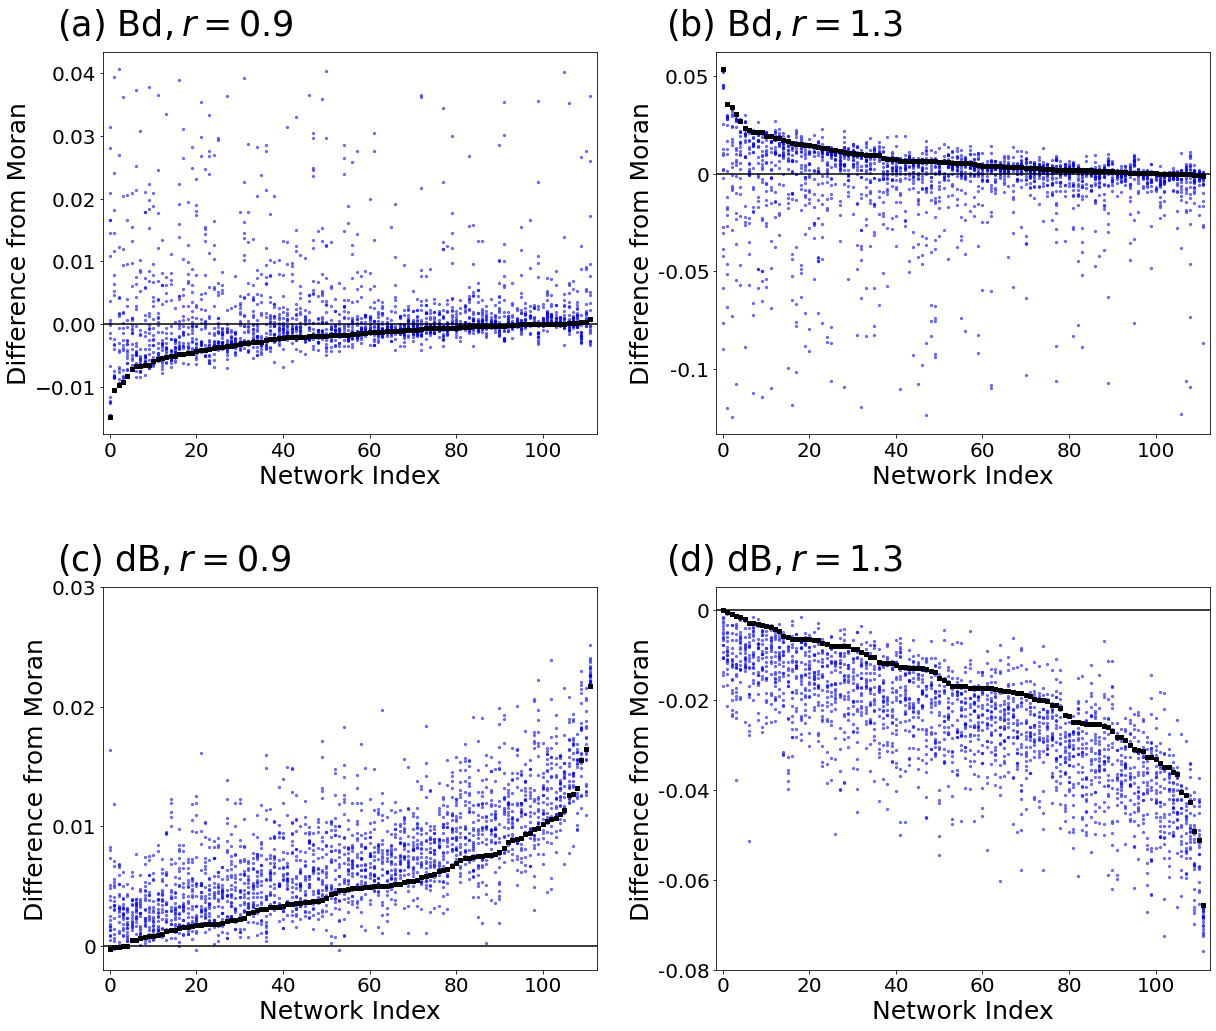

In [9]:
import matplotlib.pyplot as plt
import numpy as np



# Constants
dim = 20
radius = 5

# Create subfigures
fig, axs = plt.subplots(2, 2, figsize=(17, 15))

# First subplot (Top Left)
indices_sort_by_value = sorted(range(len(weighted_networks_10_r_1_3)), key=lambda i: weighted_networks_10_r_1_3[i], reverse=True)
for j in range(112):
    x = j * np.ones(dim)
    y = [weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(dim)]
    axs[0, 1].scatter(x, y, s=radius, alpha=0.5, color='blue')
    axs[0, 1].scatter(j, weighted_networks_10_r_1_3[indices_sort_by_value[j]], s=2*radius, color='black',marker='s')
#axs[0, 1].set_title("Bd, $r=1.3$", fontsize=30)

# Second subplot (Top Right)
indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
for j in range(112):
    x = j * np.ones(dim)
    y = [weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(dim)]
    axs[0, 0].scatter(x, y, s=radius, alpha=0.5, color='blue')
    axs[0, 0].scatter(j, weighted_networks_10_r_0_9[indices_sorted_by_value[j]], s=2*radius, color='black',marker='s')
#axs[0, 0].set_title("Bd, $r=0.9$", fontsize=30)

# Third subplot (Bottom Left)
indices_sort_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_1_3)), key=lambda i: graph_6_nodes_db_unweighted_r_1_3[i], reverse=True)
for j in range(112):
    x = j * np.ones(dim)
    y = [weighted_networks_db_6nodes[indices_sort_by_value[j]][i][12] for i in range(dim)]
    axs[1, 1].scatter(x, y, s=radius, alpha=0.5, color='blue')
    axs[1, 1].scatter(j, graph_6_nodes_db_unweighted_r_1_3[indices_sort_by_value[j]], s=2*radius, color='black',marker='s')
#axs[1, 1].set_title("Db, $r=1.3$", fontsize=30)

# Fourth subplot (Bottom Right)
indices_sorted_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_0_9)), key=lambda i: graph_6_nodes_db_unweighted_r_0_9[i], reverse=False)
for j in range(112):
    x = j * np.ones(dim)
    y = [weighted_networks_db_6nodes[indices_sorted_by_value[j]][i][8] for i in range(dim)]
    axs[1, 0].scatter(x, y, s=radius, alpha=0.5, color='blue')
    axs[1, 0].scatter(j, graph_6_nodes_db_unweighted_r_0_9[indices_sorted_by_value[j]], 
                      s=2*radius, color='black',marker='s')
#axs[1, 0].set_title("Db, $r=0.9$", fontsize=30)


axs[0, 0].axhline(y = 0, color = 'black')
axs[1, 0].axhline(y = 0, color = 'black')
axs[0, 1].axhline(y = 0, color = 'black')
axs[1, 1].axhline(y = 0, color = 'black')

axs[0, 0].set_xlim([0-1.5,112+0.5])  # Set x-axis limits
#axs[0, 0].set_ylim([0, 8])      # Set y-axis limits
axs[0, 1].set_xlim([0-1.5,112+0.5])  # Set x-axis limits
#axs[0, 1].set_ylim([0, 8])      # Set y-axis limits
axs[1, 0].set_xlim([0-1.5,112+0.5])  # Set x-axis limits
#axs[1, 0].set_ylim([0, 8])      # Set y-axis limits
axs[1, 1].set_xlim([0-1.5,112+0.5])  # Set x-axis limits
#axs[1, 1].set_ylim([0, 8])      # Set y-axis limits

# Change xtick and ytick size
axs[0,0].tick_params(axis='x', labelsize=20)
axs[1,0].tick_params(axis='x', labelsize=20) 
axs[0,1].tick_params(axis='x', labelsize=20) 
axs[1,1].tick_params(axis='x', labelsize=20)
axs[0,0].tick_params(axis='y', labelsize=20)
axs[1,0].tick_params(axis='y', labelsize=20) 
axs[0,1].tick_params(axis='y', labelsize=20) 
axs[1,1].tick_params(axis='y', labelsize=20)# Change xtick label size
#ax.tick_params(axis='y', labelsize=32) 
# Set common labels and adjust layout
for ax in axs.flat:
    ax.set_xlabel('Network Index', fontsize=25)
    ax.set_ylabel('Difference from Moran', fontsize=25)



#fig.suptitle('Comparison of Network Behaviors', fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.text(0.0495, 0.955, '(a) Bd$, r=0.9$', fontsize=35)
fig.text(0.547, 0.955, '(b) Bd$, r=1.3$', fontsize=35)
fig.text(0.0495, 0.46, '(c) dB$, r=0.9$', fontsize=35)
fig.text(0.547, 0.46, '(d) dB$, r=1.3$', fontsize=35)
# Save and display
# ticklabels
axs[0,1].set_yticks([-0.1,-0.05,0,0.05])
axs[0,1].set_yticklabels(['-0.1','-0.05','0','0.05'])
axs[1,0].set_yticks([0,0.01,0.02,0.03])
axs[1,0].set_yticklabels(['0','0.01','0.02','0.03'])
axs[1,1].set_yticks([-0.08,-0.06,-0.04,-0.02,0])
axs[1,1].set_yticklabels(['-0.08','-0.06','-0.04','-0.02','0'])

axs[1, 0].set_ylim([0-0.002,0.03]) 
axs[1, 1].set_ylim([-0.08,0+0.005]) 
#combined_scatterplot_path = '/mnt/data/combined_scatterplot.pdf'
plt.subplots_adjust(hspace=0.4) 
plt.savefig('combined_scatterplot.pdf')#, bbox_inches="tight")
plt.show()







In [22]:
c=0
for j in range(112):
    indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_1_3)), key=lambda i: weighted_networks_10_r_0_9[i])
    [weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(20)]
    c=c+sum(1 for x in [weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(20)] if x > 0)

In [23]:
c/(112*20)

0.45

In [18]:
c=0
for j in range(112):
    indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_1_3)), key=lambda i: weighted_networks_10_r_1_3[i])
    [weighted_networks_100[indices_sorted_by_value[j]][i][12] for i in range(20)]
    c=c+sum(1 for x in [weighted_networks_100[indices_sorted_by_value[j]][i][12] for i in range(20)] if x < 0)

In [19]:
c/(112*20)

0.4375

In [33]:
import math
#sign = math.sign(number)
c=0
for j in range(112):
    a=[weighted_networks_100[j][i][8] for i in range(20)]
    b=[weighted_networks_100[j][i][12] for i in range(20)]
    for k in range(20):
        if a[k]>0 and b[k]<0:
            c+=1
print(c/(112*20))


    

    
    

    

0.43125


In [24]:
    c=c+sum(1 for x in [weighted_networks_100[j][i][8] for i in range(20)] if x > 0)
    c=c+sum(1 for x in [weighted_networks_100[j][i][12] for i in range(20)] if x < 0)

In [16]:
c=0
a=[]
for j in range(112):
    indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
    a=[weighted_networks_100[indices_sorted_by_value[j]][i][8]-weighted_networks_10_r_0_9[indices_sorted_by_value[j]] for i in range(20)]
    c=c+sum(1 for x in a if x > 0)
print(c/(112*20))

0.7433035714285714


In [ ]:
c=0
for j in range(112):
    indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
    a=[weighted_networks_100[indices_sorted_by_value[j]][i][8]-weighted_networks_10_r_0_9[indices_sorted_by_value[j] for i in range(20)]
    c=c+sum(1 for x in a if x > 0)
print(c/(112*20))

In [17]:
c=0
a=[]
for j in range(112):
    indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_1_3)), key=lambda i: weighted_networks_10_r_1_3[i])
    a=[weighted_networks_100[indices_sorted_by_value[j]][i][12]-weighted_networks_10_r_1_3[indices_sorted_by_value[j]] for i in range(20)]
    c=c+sum(1 for x in a if x < 0)
print(c/(112*20))

0.7571428571428571


In [18]:
c=0
dim=20
for j in range(112):
    indices_sorted_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_0_9)), key=lambda i: graph_6_nodes_db_unweighted_r_0_9[i], reverse=False)
    c=c+sum(1 for x in [weighted_networks_db_6nodes[indices_sorted_by_value[j]][i][8]-graph_6_nodes_db_unweighted_r_0_9[indices_sorted_by_value[j]] for i in range(dim)] if x > 0)
print(c/(112*20))


0.8299107142857143


In [23]:
c/(112*20)

1.0

In [23]:
c=0
dim=20
for j in range(112):
    indices_sorted_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_1_3)), key=lambda i: graph_6_nodes_db_unweighted_r_1_3[i], reverse=False)
    c=c+sum(1 for x in [weighted_networks_db_6nodes[indices_sorted_by_value[j]][i][12]-graph_6_nodes_db_unweighted_r_1_3[indices_sorted_by_value[j]] for i in range(dim)] if x < 0)
print(c/(112*20))


0.853125


In [21]:
round(82.991, 2)

82.99